In [2]:
from qtn.bimax import BiMax
from qtn.bimax_fp import BiMax_fp
from qtn.bimax_sp import BiMax_sp
from qtn.bimax_util import do_cprofile
import numpy as np
from sympy.mpmath import mp, fp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ant_len = 50      # m (monopole) 
ant_rad = 1.9e-4  # m
base_cap = 20e-12 # Farad
al_ratio = ant_rad / ant_len
print(al_ratio)

3.8e-06


In [4]:
p1 = BiMax(ant_len, ant_rad, base_cap)
p2 = BiMax_fp(ant_len, ant_rad, base_cap)
p3 = BiMax_sp(ant_len, ant_rad, base_cap)

In [5]:
@do_cprofile
def pw_1(wc, l, n, t, tc):
    mp.dps = 20
    result = p1.za_l(wc, l, n, t, tc)
    mp.dps = 15
    return result

@do_cprofile
def pw_2(wc, l, n, t, tc):
    return p2.za_l(wc, l, n, t, tc)

@do_cprofile
def pw_3(wc, l, n, t, tc):
    return p3.za_l_sp(wc, l, n, t, tc)

In [6]:
z, wrel, l, n, t , tc= 5, 0.8, 4, 0.1, 10, 1
wc = wrel * np.sqrt(1 + n)

In [11]:
# pw_1(wc, l, n, t, tc)

In [12]:
# pw_2(wc, l, n, t, tc)

In [7]:
# pw_3(wc, l, n, t, tc)

In [8]:
wrel_arr = np.array([0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.01, 1.03, \
                         1.05, 1.08, 1.1, 1.2, 1.3, 1.5, \
                         1.7, 2.0, 2.3, 2.6, 3.0, 4, 6])

In [9]:
@do_cprofile
def pw_3(wrel, l, n, t , tc):

    return np.array([p3.bimax_sp(wrel, l, n, t, tc) for wrel in wrel_arr])

def gain(wrel, l, n, t, tc):
    
    return np.array([p3.gamma_sp(wrel, l, n, t, tc) for wrel in wrel_arr])

In [12]:
wrel, l, n, t , tc= 0.8, 6, 0.05, 10, 1e5
wc = wrel * np.sqrt(1 + n)

v2e_arr_1 = pw_3(wrel, l, n, t , tc)
gain_arr_1 = gain(wrel, l, n, t, tc)

guess =  10.5327391412
z0 =  10.9324231764 d_l.real =  -5.77315972805e-15
dl_imag =  4.40856010958e-05
guess =  6.29306782692
z0 =  6.84059832587 d_l.real =  3.77475828373e-15
dl_imag =  0.0149542685711
direct evaluating integral when peak is small
guess =  3.57109149126
z0 =  3.85663283163 d_l.real =  -1.62092561595e-14
dl_imag =  0.0628203965767
direct evaluating integral when peak is small
guess =  3.16418288032
z0 =  3.15045799779 d_l.real =  -1.55431223448e-15
dl_imag =  0.0574676068756
direct evaluating integral when peak is small
guess =  2.99182828827
z0 =  2.94008636534 d_l.real =  4.88498130835e-15
dl_imag =  0.0597275645749
direct evaluating integral when peak is small
guess =  2.58798908421
z0 =  2.33362976981 d_l.real =  1.88737914186e-15
dl_imag =  0.155873358241
direct evaluating integral when peak is small
         87098 function calls in 0.303 seconds

   Ordered by: internal time
   List reduced from 117 to 50 due to restriction <50>

   ncalls  tottime  percall  cumt

In [10]:
wrel, l, n, t , tc= 0.8, 6, 0.08, 10, 1e5
wc = wrel * np.sqrt(1 + n)

v2e_arr_2 = pw_3(wrel, l, n, t , tc)
gain_arr_2 = gain(wrel, l, n, t, tc)

guess =  11.3766585364
z0 =  11.8121702645 d_l.real =  2.38697950294e-14
dl_imag =  1.16955589632e-05
guess =  6.79729013062
z0 =  7.63067060461 d_l.real =  1.50990331349e-14
dl_imag =  0.0102923024541
direct evaluating integral when peak is small
guess =  3.33943224735
z0 =  3.51939947213 d_l.real =  -4.66293670343e-15
dl_imag =  0.0956842466837
direct evaluating integral when peak is small
guess =  3.02740753589
z0 =  2.98768692431 d_l.real =  1.99840144433e-15
dl_imag =  0.0877319975666
direct evaluating integral when peak is small
guess =  2.8895291343
z0 =  2.80982654687 d_l.real =  -4.4408920985e-16
dl_imag =  0.0915457667914
direct evaluating integral when peak is small
guess =  2.55627250242
z0 =  2.22020465435 d_l.real =  -8.881784197e-16
dl_imag =  0.218944454032
direct evaluating integral when peak is small
         93254 function calls in 0.328 seconds

   Ordered by: internal time
   List reduced from 117 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime 

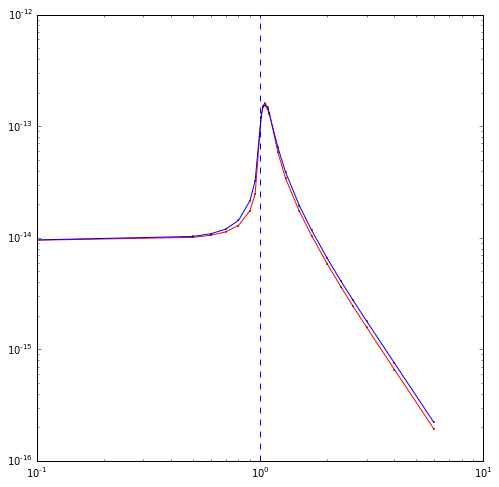

In [13]:
fig = plt.figure(figsize = [8, 8])
plt.plot(wrel_arr, v2e_arr_1 / gain_arr_1, '-or', markersize = 1)
plt.plot(wrel_arr, v2e_arr_2 / gain_arr_2, '-ob', markersize = 1)
plt.axvline(1.0, linestyle = 'dashed')
plt.yscale('log')
plt.xscale('log')
#plt.axhline(v2e_arr[0], linestyle = 'dashed')